In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv('D:/DATA/CNN_data_plus_plus.csv')
# dataset = dataset.dropna()
dataset.head(10)

,heat_T,end_T,crimp_T,start_T,compression,C,Si,Mn,P,S,yield
0,1157,877.40,586.26,1039.09,0.892883,0.1733,0.086,0.440,0.0182,0.0041,453
1,1153,877.06,567.56,1042.66,0.889304,0.1815,0.039,0.382,0.0153,0.0039,412
2,1154,881.88,569.75,1049.66,0.889305,0.1805,0.052,0.427,0.0089,0.0027,418
3,1147,877.44,574.07,1041.14,0.889306,0.1671,0.038,0.374,0.0150,0.0034,406
4,1153,884.18,569.95,1046.17,0.892886,0.1825,0.036,0.406,0.0136,0.0056,423
5,1134,898.69,598.30,1037.43,0.889320,0.1799,0.085,0.511,0.0134,0.0039,400
6,1143,893.83,595.98,1045.46,0.889295,0.1831,0.063,0.569,0.0175,0.0043,447
7,1143,847.96,558.34,1031.71,0.921439,0.1798,0.073,0.434,0.0097,0.0045,421
8,1145,895.42,571.99,1034.74,0.921457,0.1777,0.057,0.433,0.0151,0.0037,402
9,1153,888.67,578.54,1046.40,0.892876,0.1732,0.058,0.436,0.0068,0.0031,442


(0.0, 18.0)

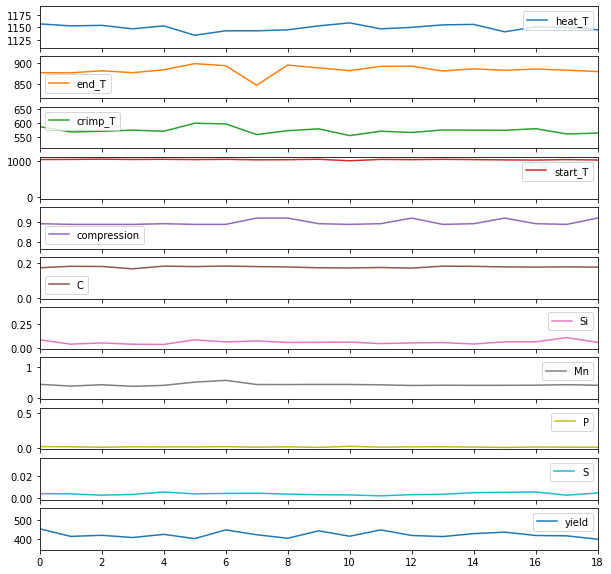

In [3]:
dataset.plot(subplots = True, figsize=(10,10))
plt.xlim(0,18)

In [4]:
y_o=dataset[['yield']]
x_o=dataset[['heat_T','end_T','crimp_T','start_T','compression','C','Si','Mn','P','S']]

In [5]:
from sklearn import preprocessing
# std_scale = preprocessing.StandardScaler().fit(dataset)
std_scale1 = preprocessing.StandardScaler().fit(x_o)
std_scale2 = preprocessing.StandardScaler().fit(y_o)

# standard = std_scale.transform(dataset)
# standard = pd.DataFrame(standard)
x = std_scale1.transform(x_o)
y = std_scale2.transform(y_o)
x = pd.DataFrame(x)
y = pd.DataFrame(y)

# y = standard[10]
# x = standard.loc[:,0:9]

# y = std_scale.transform(y_o)
# dataset = pd.DataFrame(dataset)

In [6]:
# y=dataset[['yield']]
# x=dataset[['heat_T','end_T','crimp_T','start_T','compression','C','Si','Mn','P','S']]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state=1)
# shuffle = True, random_state=1
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [8]:
# x_test1 = std_scale1.inverse_transform(x_test)
# y_test1 = std_scale2.inverse_transform(y_test)
# x_test2 = pd.DataFrame(x_test1)
# # x_test2.to_excel('D:/DATA/To.xlsx')
# y_test2 = pd.DataFrame(y_test1)
# Total_original = pd.concat([x_test2,y_test2],axis = 1)
# # Total_final = pd.concat([Total_original,Total],axis = 1)
# Total_original.to_excel('D:/DATA/T_ori5.xlsx')

In [9]:
import torch
import torch.nn as nn
from torch.nn import Conv1d
from torch.nn import MaxPool1d
from torch.nn import AvgPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu 
from torch.utils.data import DataLoader, TensorDataset

In [10]:
class CNN(torch.nn.Module):
    def __init__(self, batch_size, inputs, outputs):
        super(CNN, self).__init__()
        self.batch_size = batch_size
        self.inputs = inputs
        self.outputs = outputs
        self.input_layer = Conv1d(inputs, batch_size, 1)
        self.max_pooling_layer= MaxPool1d(1)
        self.avg_pooling_layer= AvgPool1d(1)
    #adding 2 layers
    #using 1024 neurons
        self.conv_layer = Conv1d(batch_size, 512, 1) 
        self.conv_layer1 = Conv1d(512, 1024, 1)
        self.flatten_layer = Flatten()
        self.linear_layer = Linear(1024,64)
        self.outputs_layer = Linear(64, outputs)
        self.dropout = nn.Dropout(p=0.4)
        
    def forward(self, input):
        input = input.reshape((self.batch_size, self.inputs, 1))
        output = relu(self.input_layer(input))
        output = self.max_pooling_layer(output)
        output = relu(self.conv_layer(output))
        output = relu(self.conv_layer1(output))

        output = self.flatten_layer(output)
        output = self.linear_layer(output)
#         output = self.dropout(output)
        output = self.outputs_layer(output)
#         output = self.dropout(output)
        return output

In [11]:
from torch.optim import Adam
from torch.nn import L1Loss , MSELoss
from ignite.contrib.metrics.regression.r2_score import R2Score

In [12]:
batch_size = 64
model = CNN(batch_size, x.shape[1],1)
model.cuda()

CNN(
  (input_layer): Conv1d(10, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (avg_pooling_layer): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  (conv_layer): Conv1d(64, 512, kernel_size=(1,), stride=(1,))
  (conv_layer1): Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (linear_layer): Linear(in_features=1024, out_features=64, bias=True)
  (outputs_layer): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [13]:
def model_loss(model, dataset, train = False, optimizer = None):
    performance = L1Loss()
    M = MSELoss()
    score_metric = R2Score()

    avg_loss = 0
#     error = 0
    avg_MSE = 0
    avg_score = 0
    count = 0

    for input, output in iter(dataset):
        predictions = model.forward(input)
        loss = performance(predictions, output)
#         pc = (predictions - output) / output
        MSE = M(predictions,output)
        score_metric.update([predictions,output])
        score = score_metric.compute()

        if(train):
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        avg_loss += loss.item()
#         error += pc.item()
        avg_MSE += MSE.item()
        avg_score += score
        count += 1 
        
    return avg_loss / count , avg_score / count , avg_MSE / count 

In [14]:
model

CNN(
  (input_layer): Conv1d(10, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (avg_pooling_layer): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  (conv_layer): Conv1d(64, 512, kernel_size=(1,), stride=(1,))
  (conv_layer1): Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (linear_layer): Linear(in_features=1024, out_features=64, bias=True)
  (outputs_layer): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [15]:
import time
epochs = 400
print('Trainable parameters are:' + str(model.parameters()))
optimizer = Adam(model.parameters(), lr = 0.001, weight_decay= 0.0001)
inputs = torch.from_numpy(x_train_np).cuda().float() #!!!!!!!!.cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()#!!!!!!!!
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size,drop_last=True)
#  shuffle= True drop_last=True
r2plot = []
MSEplot = []
MAEplot = []
# errorplot = []

training_startingTime = time.time()
for epoch in range(epochs):
    
    avg_loss , avg_r2_score , avg_MSE = model_loss(model, loader, train=True, optimizer=optimizer)
#   r = [avg_r2_score,epoch]
    r2plot.append(avg_loss)
    MSEplot.append(avg_MSE)
    MAEplot.append(avg_loss)
#     errorplot.append(error)

    print("Epoch" + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " + str(avg_r2_score) + "\n\tMSE = " + str(avg_MSE))
    
    training_endTime = time.time() - training_startingTime
    print(training_endTime)
    

Trainable parameters are:<generator object Module.parameters at 0x000001C04B0913C0>
Epoch1:
	Loss = 0.7954001814820045
	R^2 Score = -0.05417619253647751
	MSE = 1.012453030015147
2.4198343753814697
Epoch2:
	Loss = 0.7839553820532422
	R^2 Score = 0.0009295170379211815
	MSE = 0.9869393699390944
2.7669126987457275
Epoch3:
	Loss = 0.7642219565635504
	R^2 Score = 0.05993699490078805
	MSE = 0.9331766581812571
3.096987247467041
Epoch4:
	Loss = 0.7590448842492215
	R^2 Score = 0.07800108929352893
	MSE = 0.9183493422907453
3.4440650939941406
Epoch5:
	Loss = 0.7542789529922397
	R^2 Score = 0.08458062868593466
	MSE = 0.9109836172225864
3.783141851425171
Epoch6:
	Loss = 0.7512590788131537
	R^2 Score = 0.08952627798436642
	MSE = 0.9062109007391819
4.120217561721802
Epoch7:
	Loss = 0.7479502212169559
	R^2 Score = 0.0946722911548044
	MSE = 0.900930619517038
4.479298830032349
Epoch8:
	Loss = 0.7471601082835087
	R^2 Score = 0.09422984819818381
	MSE = 0.9015317025572754
4.821376085281372
Epoch9:
	Loss = 0

Epoch73:
	Loss = 0.652786600381829
	R^2 Score = 0.2418783208409257
	MSE = 0.7555585905562999
27.86357283592224
Epoch74:
	Loss = 0.6532009708326917
	R^2 Score = 0.2399298504533767
	MSE = 0.7557625195314718
28.193647623062134
Epoch75:
	Loss = 0.6539557004390761
	R^2 Score = 0.2427400541812885
	MSE = 0.7550130268169004
28.540725708007812
Epoch76:
	Loss = 0.6528436583141948
	R^2 Score = 0.24176367706229873
	MSE = 0.7547130664420683
28.919811010360718
Epoch77:
	Loss = 0.6506794451974159
	R^2 Score = 0.24364436284726623
	MSE = 0.751666200715442
29.25988793373108
Epoch78:
	Loss = 0.6517699537582176
	R^2 Score = 0.24376736847779507
	MSE = 0.7528131306171417
29.666979551315308
Epoch79:
	Loss = 0.652054700740548
	R^2 Score = 0.24419221406839126
	MSE = 0.7524424209151157
30.107078790664673
Epoch80:
	Loss = 0.6515232567177263
	R^2 Score = 0.24460873530129107
	MSE = 0.7529869897421017
30.529174089431763
Epoch81:
	Loss = 0.6508624574472738
	R^2 Score = 0.24359684001902304
	MSE = 0.7511337662852088
3

Epoch146:
	Loss = 0.6381020085063092
	R^2 Score = 0.25808133610040257
	MSE = 0.7359600139911785
53.64182686805725
Epoch147:
	Loss = 0.6374446375425472
	R^2 Score = 0.2599296468783706
	MSE = 0.7344284719505976
53.99302053451538
Epoch148:
	Loss = 0.6359420224677684
	R^2 Score = 0.2621636396767112
	MSE = 0.7329036797894988
54.33010411262512
Epoch149:
	Loss = 0.6374973017115926
	R^2 Score = 0.26007627703013086
	MSE = 0.7346307659565017
54.671175956726074
Epoch150:
	Loss = 0.6367233742115109
	R^2 Score = 0.26075894938637756
	MSE = 0.7340819953485976
55.017802000045776
Epoch151:
	Loss = 0.6370148582513943
	R^2 Score = 0.2604454241966154
	MSE = 0.7347870223050894
55.35974860191345
Epoch152:
	Loss = 0.6360237196434376
	R^2 Score = 0.2608192928072951
	MSE = 0.7338870444963145
55.70457935333252
Epoch153:
	Loss = 0.6370170123355333
	R^2 Score = 0.26217937993566104
	MSE = 0.7338689468627753
56.053802251815796
Epoch154:
	Loss = 0.6357779152864633
	R^2 Score = 0.261723432806633
	MSE = 0.733439805895

Epoch219:
	Loss = 0.6224796415068382
	R^2 Score = 0.2897411838055288
	MSE = 0.7076503073060235
79.57015228271484
Epoch220:
	Loss = 0.620507309256598
	R^2 Score = 0.2919960807427813
	MSE = 0.7056107202241587
79.90023636817932
Epoch221:
	Loss = 0.6209781866434009
	R^2 Score = 0.2915660634643766
	MSE = 0.7064119553150132
80.24473476409912
Epoch222:
	Loss = 0.6206403887549112
	R^2 Score = 0.290532149659605
	MSE = 0.7061817493549613
80.57760286331177
Epoch223:
	Loss = 0.6204558558935342
	R^2 Score = 0.2912500002661399
	MSE = 0.7066242157719856
80.89066934585571
Epoch224:
	Loss = 0.619637668132782
	R^2 Score = 0.29161429644827186
	MSE = 0.7056143685828807
81.22726821899414
Epoch225:
	Loss = 0.6205309840828873
	R^2 Score = 0.29233213304983785
	MSE = 0.7058538375205772
81.56372475624084
Epoch226:
	Loss = 0.6194816328758417
	R^2 Score = 0.29213932821221217
	MSE = 0.7053610238918039
81.88662195205688
Epoch227:
	Loss = 0.6193583638862122
	R^2 Score = 0.29213712826686716
	MSE = 0.7052055808693863


Epoch292:
	Loss = 0.6103669086167979
	R^2 Score = 0.3051721261103948
	MSE = 0.69305081388285
105.62700891494751
Epoch293:
	Loss = 0.6101834098267
	R^2 Score = 0.30437943723088606
	MSE = 0.6921055459005888
105.96318006515503
Epoch294:
	Loss = 0.6109559477068657
	R^2 Score = 0.3064812130422323
	MSE = 0.6924328481735185
106.27673935890198
Epoch295:
	Loss = 0.6119679656139639
	R^2 Score = 0.30246992954735746
	MSE = 0.693289436573206
106.62058162689209
Epoch296:
	Loss = 0.6081516354583031
	R^2 Score = 0.3070565916499886
	MSE = 0.6904779589453409
106.96593189239502
Epoch297:
	Loss = 0.6094061271395794
	R^2 Score = 0.30657864054335543
	MSE = 0.6914197799078253
107.29455852508545
Epoch298:
	Loss = 0.6094464205725248
	R^2 Score = 0.3060470074249746
	MSE = 0.69137058216472
107.64209175109863
Epoch299:
	Loss = 0.6098456445128418
	R^2 Score = 0.3049253871953548
	MSE = 0.6918735289296438
108.00137519836426
Epoch300:
	Loss = 0.6101082293100135
	R^2 Score = 0.3070490387927579
	MSE = 0.691568823054779

Epoch364:
	Loss = 0.5968840129153673
	R^2 Score = 0.3240865394275922
	MSE = 0.6758552439684091
131.1451518535614
Epoch365:
	Loss = 0.5975116314583047
	R^2 Score = 0.3238748713957161
	MSE = 0.6764994748803073
131.47337651252747
Epoch366:
	Loss = 0.595740715085074
	R^2 Score = 0.32548934546122976
	MSE = 0.6753515836804412
131.79247045516968
Epoch367:
	Loss = 0.5958025316859401
	R^2 Score = 0.3257079905206392
	MSE = 0.6745303248943284
132.12864184379578
Epoch368:
	Loss = 0.5963352707236312
	R^2 Score = 0.32493594858086594
	MSE = 0.6753688167000926
132.45727825164795
Epoch369:
	Loss = 0.596723749540573
	R^2 Score = 0.32314656755194343
	MSE = 0.675939200229423
132.77780890464783
Epoch370:
	Loss = 0.5961807099885719
	R^2 Score = 0.3248917343349609
	MSE = 0.6751392189153406
133.1065936088562
Epoch371:
	Loss = 0.5961132028768229
	R^2 Score = 0.3247459637592908
	MSE = 0.6754974508008291
133.45036792755127
Epoch372:
	Loss = 0.5992221797621528
	R^2 Score = 0.31909066322359
	MSE = 0.68385201103465

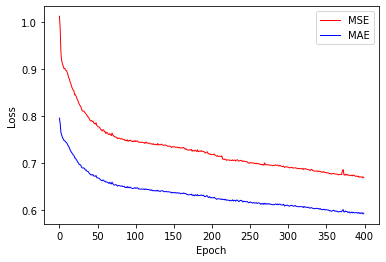

In [16]:
plt.plot(MSEplot, lw=1, c='red', label='MSE')  # 绘制MSE
plt.plot(MAEplot, lw=1, c='b', label='MAE')  # 绘制MAE

plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.legend()  
plt.savefig('train_loss.png')
plt.show()

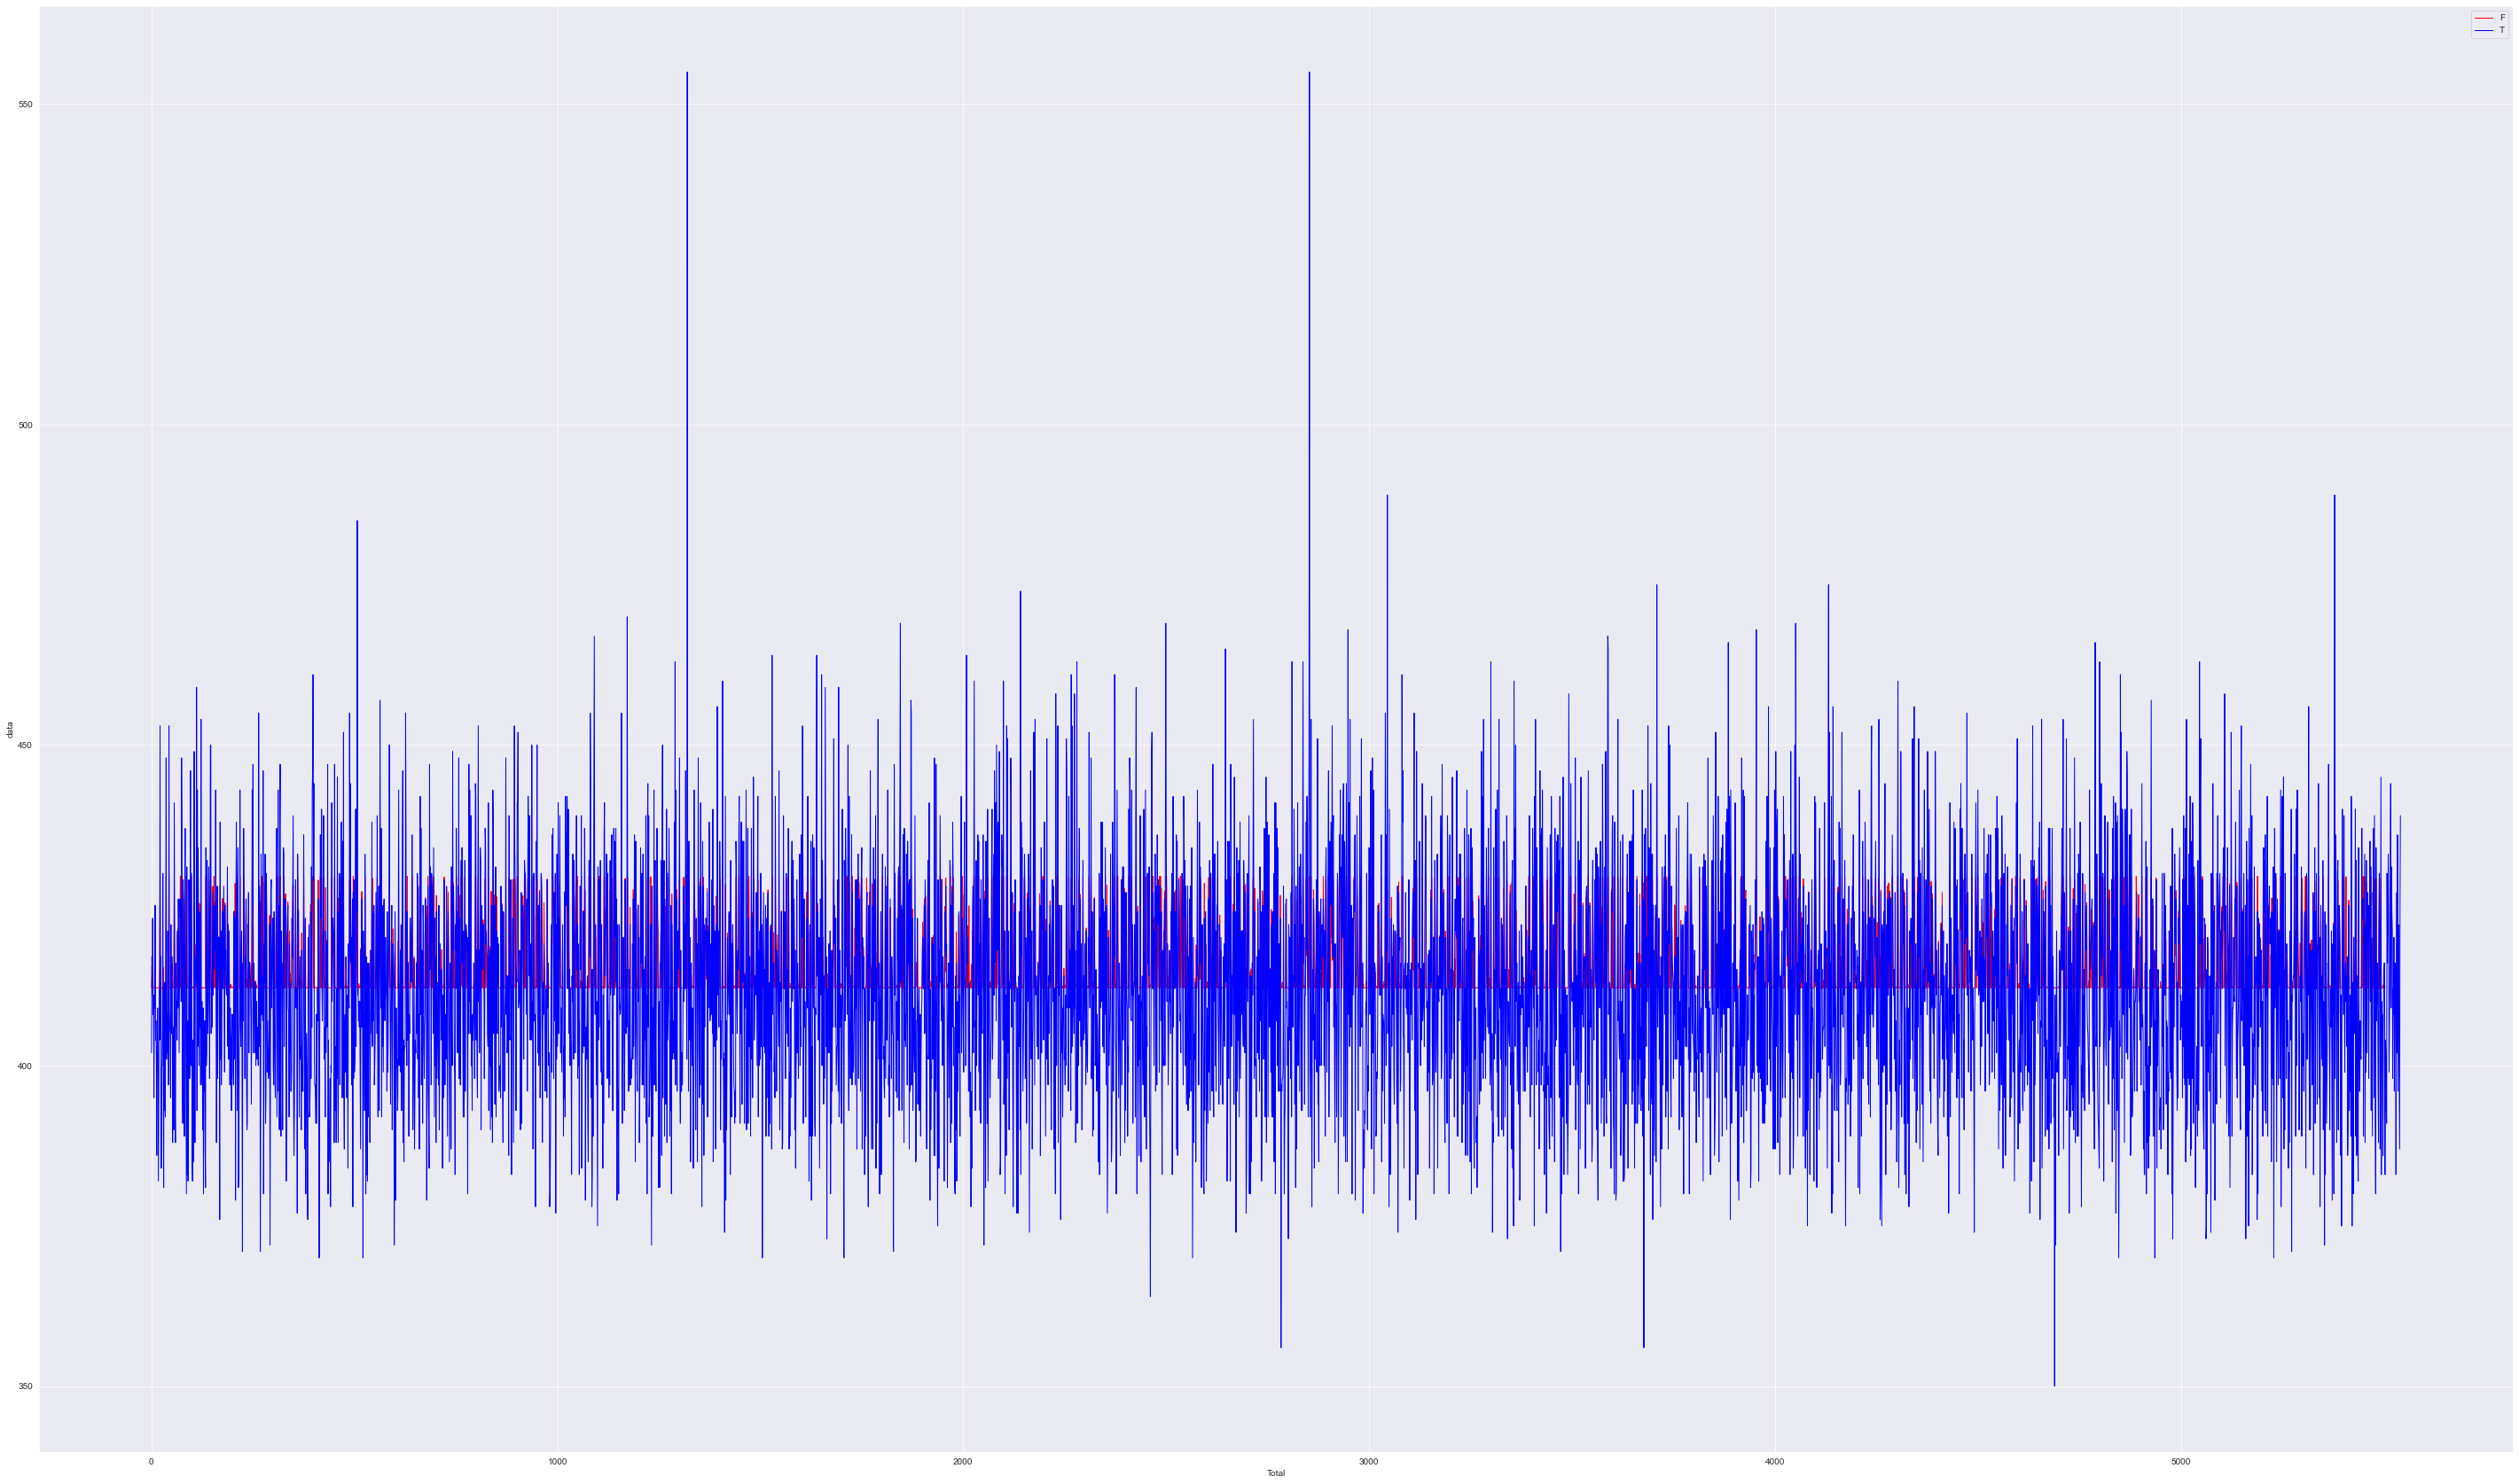

TrainMae: 10.31 MAE


In [17]:
pred = []

for input,output in iter(loader):
    predictions = model.forward(input)
    predictions = np.array(predictions.cpu().detach().numpy())
    predictions = std_scale2.inverse_transform(predictions)
    pred.append(predictions)

pred_np = np.array(pred) 
x = pred_np.reshape(-1)

y_train_f = std_scale2.inverse_transform(y_train)                                       
                                         
sns.set_style("darkgrid")
plt.figure(figsize = (50,30))
plt.plot(x, lw=1, c='red', label='F')  
plt.plot(y_train_f, lw=1, c='b', label='T')  

plt.xlabel('Total')  
plt.ylabel('data') 
plt.legend() 

plt.show()
from sklearn.metrics import mean_squared_error,mean_absolute_error

y_o=dataset[['yield']]
# TrainMae = mean_absolute_error(y_train_f[:3072,], x)
TrainMae = mean_absolute_error(y_train_f[:x.shape[0],], x)
print('TrainMae: %.2f MAE' % (TrainMae))

In [18]:
# pred = []

# for input,output in iter(loader):
#     predictions = model.forward(input)
    
#     predictions = np.array(predictions.cpu().detach().numpy())
    
    
    
#     predictions=std_scale2.inverse_transform(predictions)
#     pred.append(predictions)

# pred_np = np.array(pred) 
# x = pred_np.reshape(-1)

# y_train_f=std_scale2.inverse_transform(y_train)                                       
                                         
# sns.set_style("darkgrid")
# plt.figure(figsize = (50,30))
# plt.plot(x, lw=1, c='red', label='F')  
# plt.plot(y_train_f, lw=1, c='b', label='T')  

# plt.xlabel('Total')  
# plt.ylabel('data') 
# plt.legend() 

# plt.show()
# from sklearn.metrics import mean_squared_error,mean_absolute_error

# y_o=dataset[['yield']]
# # TrainMae = mean_absolute_error(y_train_f[:3072,], x)
# TrainMae = mean_absolute_error(y_train_f[:x.shape[0],], x)
# print('TrainMae: %.2f MAE' % (TrainMae))

In [19]:
state_dict = model.state_dict()
# torch.save(state_dict, 'D:/DATA/CNN.pt')

In [20]:
# torch.save(model.state_dict, '11_1dconv_reg')
# models = torch.load('11_1dconv_reg')
model.eval()

CNN(
  (input_layer): Conv1d(10, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (avg_pooling_layer): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  (conv_layer): Conv1d(64, 512, kernel_size=(1,), stride=(1,))
  (conv_layer1): Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (linear_layer): Linear(in_features=1024, out_features=64, bias=True)
  (outputs_layer): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [21]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print( "Trainable parameters : " + str(count_parameters(model)))

Trainable parameters : 624961


In [22]:
# new = pd.read_csv('D:/DATA/T.csv')
# y_new_o=new[['yield']]
# x_new_o=new[['heat_T','end_T','crimp_T','start_T','compression','C','Si','Mn','P','S']]
# std_scale3 = preprocessing.StandardScaler().fit(x_new_o)
# std_scale4 = preprocessing.StandardScaler().fit(y_new_o)
# x_n = std_scale3.transform(x_new_o)
# y_n = std_scale4.transform(y_new_o)
# x_new = pd.DataFrame(x_n)
# y_new = pd.DataFrame(y_n)

# x_test_new = x_new.to_numpy()
# y_test_new = y_new.to_numpy()

In [23]:
# import time
# inputs = torch.from_numpy(x_test_new).cuda().float()#!!!!!!!!
# outputs = torch.from_numpy(y_test_new.reshape(y_test_new.shape[0],1)).cuda().float()#!!!!!!!!.cuda()

# test_tensor = TensorDataset(inputs, outputs)
# test_loader = DataLoader(test_tensor,batch_size, drop_last=True)

# testing_startingTime = time.time()

# avg_loss, avg_r2_score , avg_MSE = model_loss(model, test_loader)

# print("The model's L1 loss is " + str(avg_loss)+ "\n\tR^2 Score = " + str(avg_r2_score) + "\n\tMSE = " + str(avg_MSE))
# testing_endTime = time.time() - testing_startingTime
# print(testing_endTime)

In [24]:
# pred_new = []
# for input,output in iter(test_loader):
#     prediction_n = model.forward(input)
#     prediction_n = np.array(prediction_n.cpu().detach().numpy())
#     prediction_n = std_scale4.inverse_transform(prediction_n)
#     pred_new.append(prediction_n)
    
# pred_np_new = np.array(pred_new) 
# x_new = pred_np_new.reshape(-1)
# y_test_new_fa = std_scale4.inverse_transform(y_n)

# sns.set_style("darkgrid")
# plt.figure(figsize = (50,30))
# plt.plot(x_new, lw=1, c='red', label='F')  
# plt.plot(y_test_new_fa, lw=1, c='b', label='T')  

# plt.xlabel('Total')  
# plt.ylabel('data') 
# plt.legend() 

# plt.show()

In [25]:
# print(y_test_new_fa)

In [26]:
# y_test_new_fa = std_scale4.inverse_transform(y_n)
                                                                                
# sns.set_style("darkgrid")
# plt.figure(figsize = (50,30))
# plt.plot(x_new, lw=1, c='red', label='F')  
# plt.plot(y_test_new_fa, lw=1, c='b', label='T')  

# plt.xlabel('Total')  
# plt.ylabel('data') 
# plt.legend() 

# plt.show()
# from sklearn.metrics import mean_squared_error,mean_absolute_error

# # piancha = (y_test_f[:2368,]) - (x_t)

# # y_o=dataset[['yield']][:2368,]
# TestMae = mean_absolute_error(y_test_new_fa[:64,], x_new)
# print('TestMae: %.2f MAE' % (TestMae))

In [27]:
# print(x_new)

TESTING MODEL

In [28]:
inputs = torch.from_numpy(x_test_np).cuda().float()#!!!!!!!!
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()#!!!!!!!!.cuda()

test_tensor = TensorDataset(inputs, outputs)
test_loader = DataLoader(test_tensor,batch_size, drop_last=True)
# shuffle=True,
testing_startingTime = time.time()
            
avg_loss, avg_r2_score , avg_MSE = model_loss(model, test_loader)

print("The model's L1 loss is " + str(avg_loss)+ "\n\tR^2 Score = " + str(avg_r2_score) + "\n\tMSE = " + str(avg_MSE))
testing_endTime = time.time() - testing_startingTime
print(testing_endTime)

The model's L1 loss is 0.6989769613420641
	R^2 Score = 0.17468065391424395
	MSE = 0.8126330665639929
0.04686403274536133


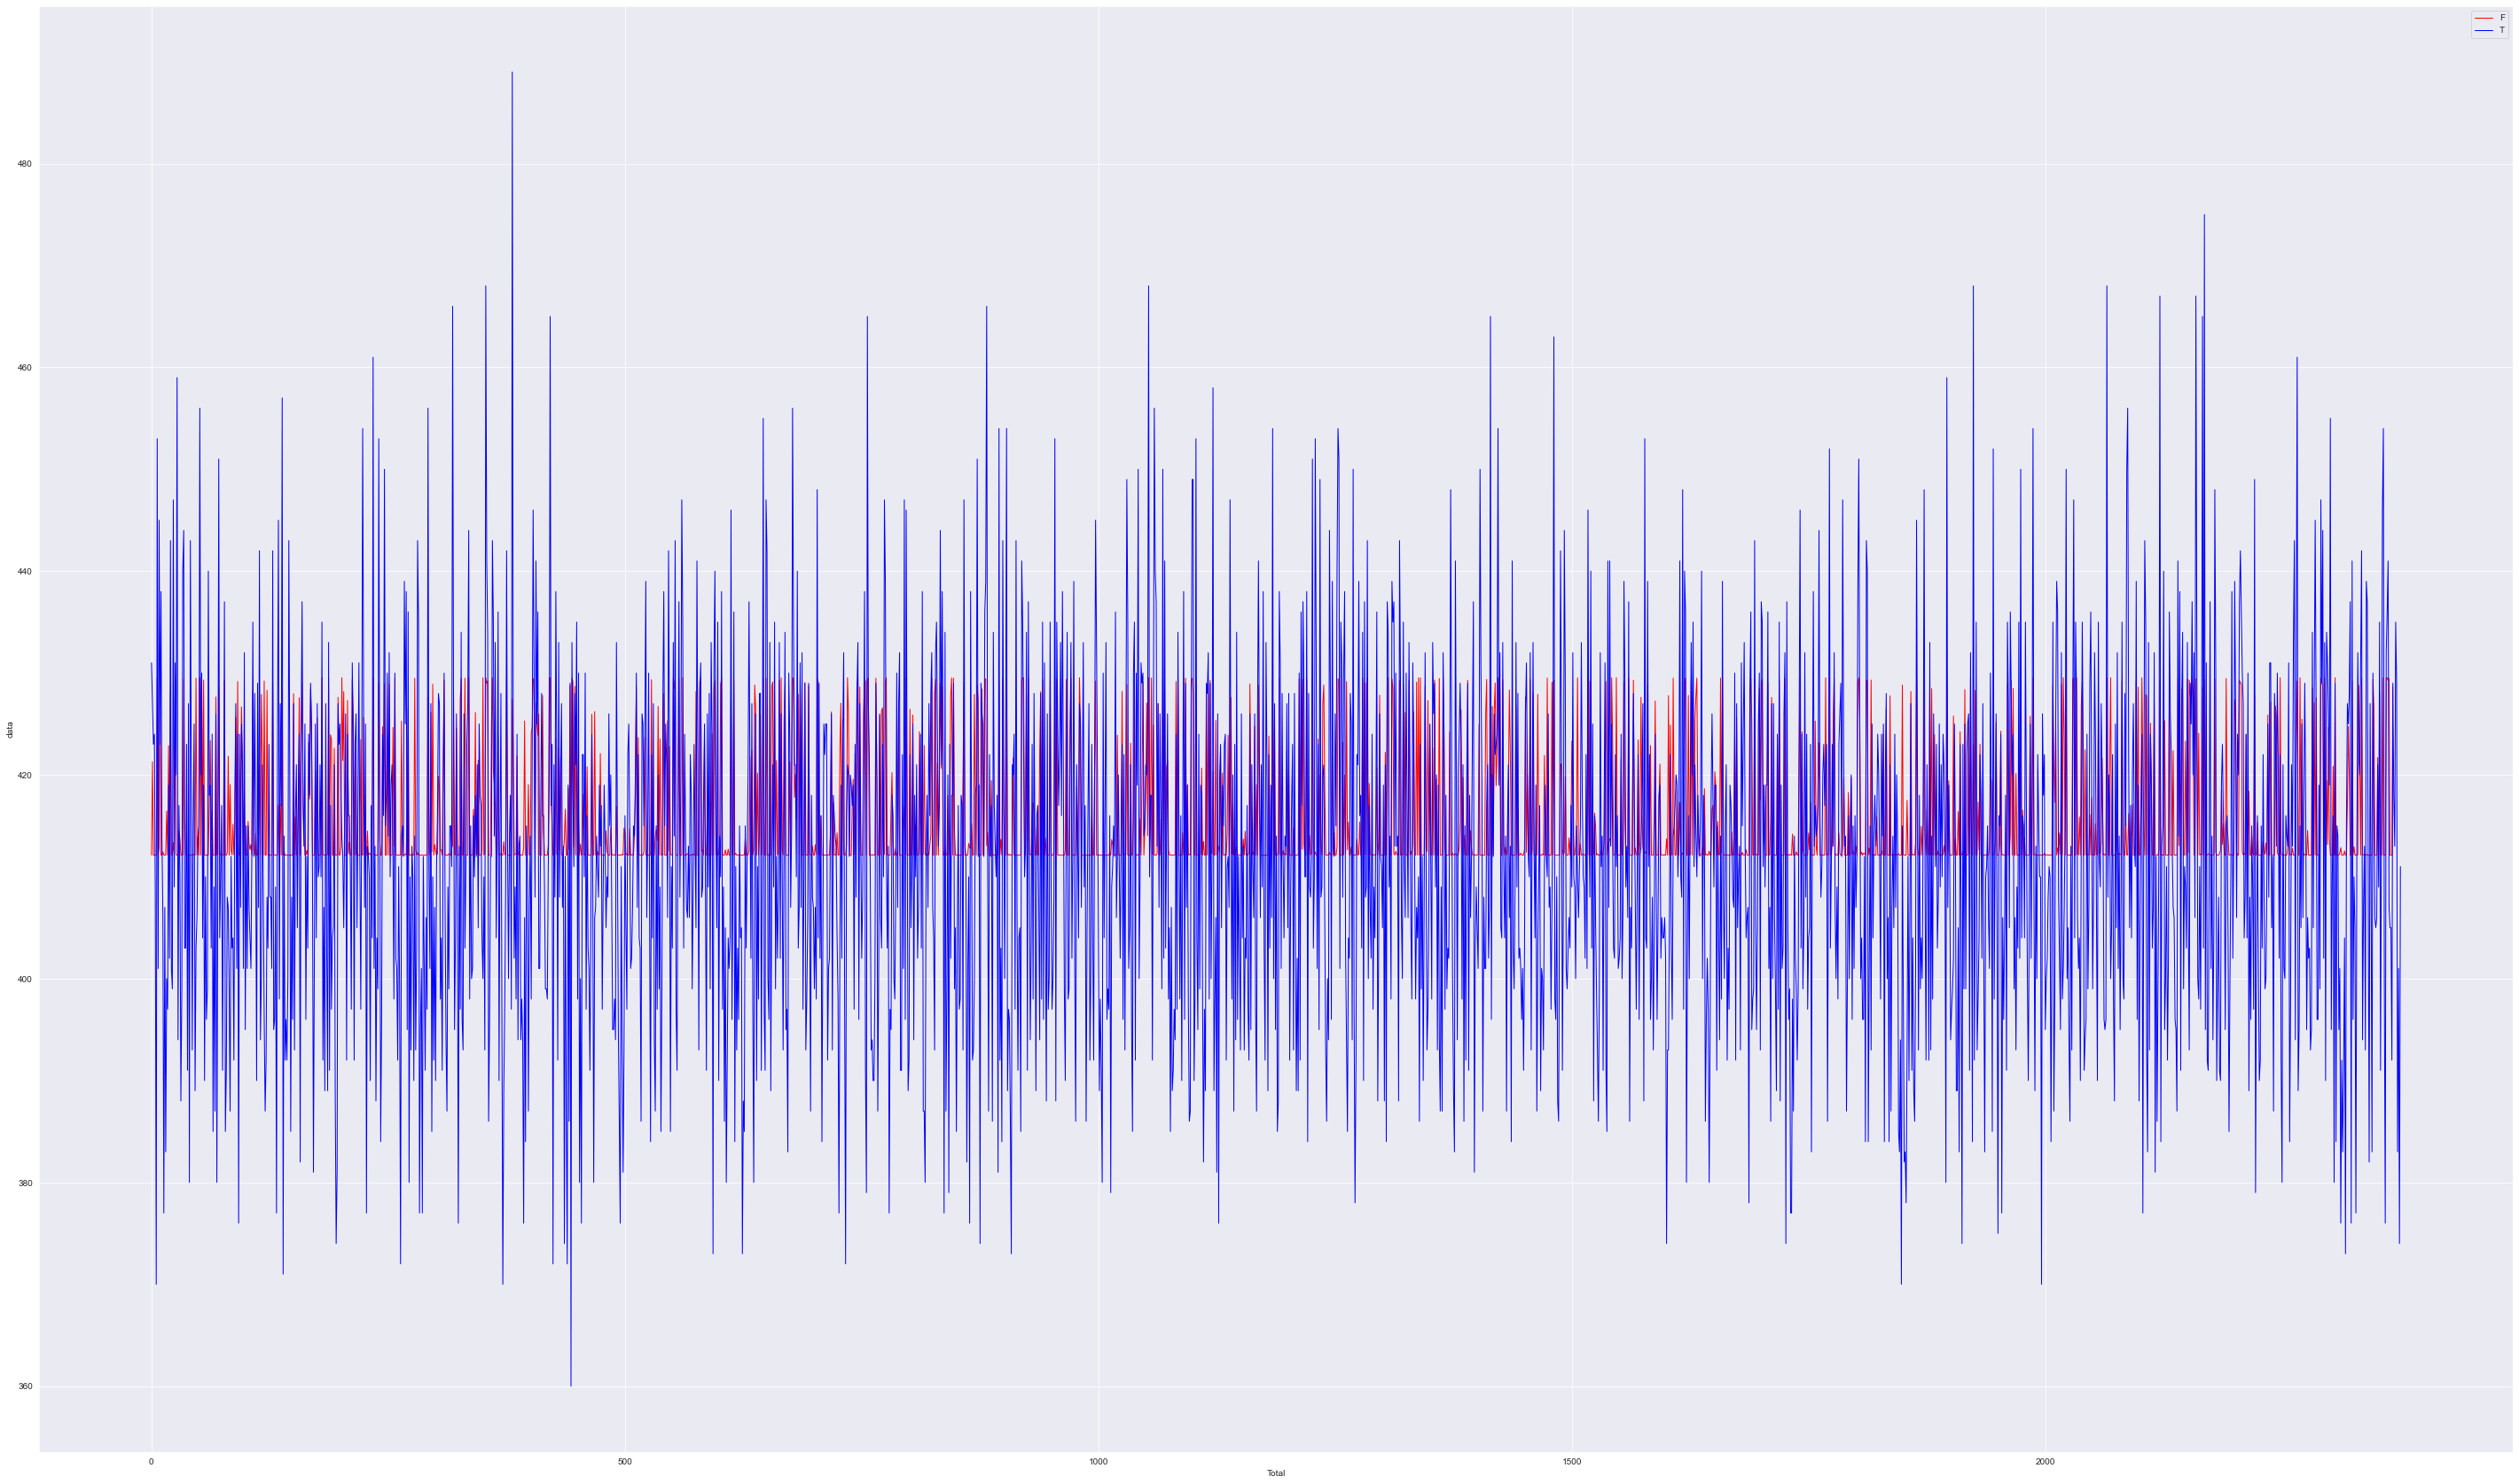

TestMae: 12.17 MAE


In [29]:
pred_t = []
for input,output in iter(test_loader):
    prediction_t = model.forward(input)
    prediction_t = np.array(prediction_t.cpu().detach().numpy())
    prediction_t = std_scale2.inverse_transform(prediction_t)
    pred_t.append(prediction_t)
#     piancha = prediction_t - output
#     pi.append(piancha)
    
pred_np_t = np.array(pred_t) 
x_t = pred_np_t.reshape(-1)

y_test_f = std_scale2.inverse_transform(y_test)
                                                                                
sns.set_style("darkgrid")
plt.figure(figsize = (50,30))
plt.plot(x_t, lw=1, c='red', label='F')  
plt.plot(y_test_f, lw=1, c='b', label='T')  

plt.xlabel('Total')  
plt.ylabel('data') 
plt.legend() 

plt.show()
from sklearn.metrics import mean_squared_error,mean_absolute_error

# piancha = (y_test_f[:2368,]) - (x_t)

# y_o=dataset[['yield']]
# TestMae = mean_absolute_error(y_test_f[:1280,], x_t)
TestMae = mean_absolute_error(y_test_f[:x_t.shape[0],], x_t)
print('TestMae: %.2f MAE' % (TestMae))

In [30]:
# np.set_printoptions(threshold=np.inf)
# print(y_test_f[:1280,])

In [31]:
x_two = x_t.reshape(-1,1)
x_two_df = pd.DataFrame(x_two)
y_test_f_df = pd.DataFrame(y_test_f[:x_two.shape[0],])
# y_test_f_df = pd.DataFrame(y_test_f[:1280,])
Total = pd.concat([x_two_df,y_test_f_df],axis = 1)
Total.to_excel('D:/DATA/new_data.xlsx')

In [32]:
# Total_final = pd.concat([Total_original,x_two_df],axis = 1)
# Total_final.to_excel('D:/DATA/T_final2.xlsx')

In [33]:
# import pygad.torchga
# import pygad

# def fitness_func(solution, sol_idx):
#     global inputs, outputs, torch_ga, model, loss_function

#     predictions = pygad.torchga.predict(model=model, 
#                                         solution=solution, 
#                                         data=inputs)
#     abs_error = loss_function(predictions, outputs).detach().numpy() + 0.00000001

#     solution_fitness = 1.0 / abs_error

#     return solution_fitness

# def callback_generation(ga_instance):
#     print("Generation = {generation}".format(generation=ga_instance.generations_completed))
#     print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))